## Clasificación con SKlearn

* Empezaremos analizando como clasificar números de una base e datos llamada MNIST , primero de manera binaria, buscando acertar con un número en concreto y después exploraremos con multiples clasificaciones

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
## Una descripción de la base de datos por si quiere revisarla
print(mnist.DESCR)


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
## Extrayendo caracteristicas de la base de datos
print('=='*32)
print(mnist.keys())
print('=='*32)

X, y = mnist.data, mnist.target

print('=='*32)
print(X)
print()
print(y)
print()
print(X.shape)
print()
print(y.shape)
print('=='*32)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

['5' '0' '4' ... '4' '5' '6']

(70000, 784)

(70000,)


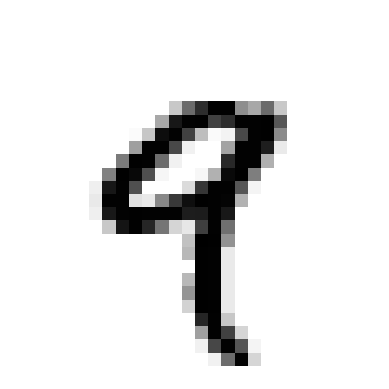

In [6]:
## Visualizando como vienen dados los datos a nivel de pixeles
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[4]
plot_digit(some_digit)
plt.show()

In [7]:
y[4]

'9'

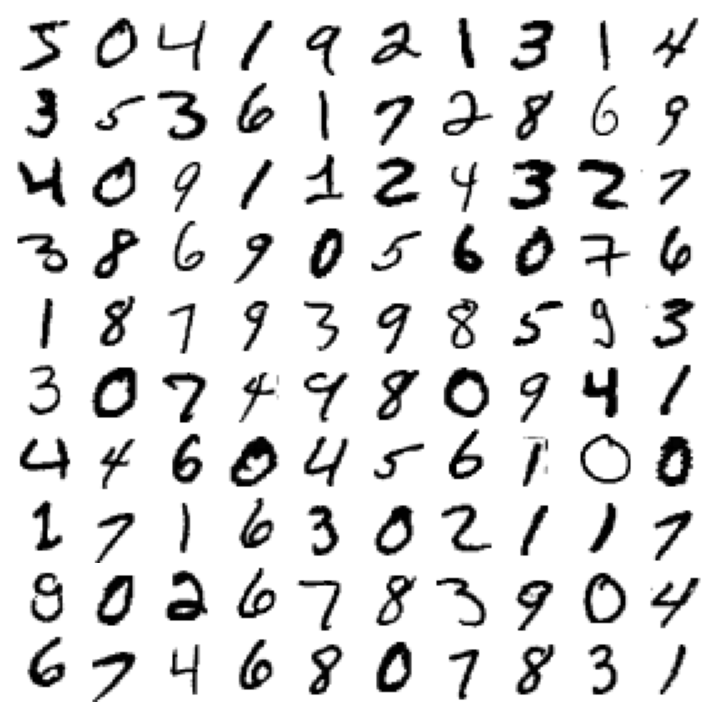

In [8]:
# Si quieren ver como vienen dado los datos
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

## Dividiendo los datos

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [10]:
## Vamos a buscar todos los números 8

y_train_8 = (y_train == '8')
y_test_8 = (y_test == '8')

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(random_state=42)

In [12]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [13]:
sgd_clf.predict([some_digit])


array([False])

### Metricas de desempeño del modelo

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,
                X_train,
                y_train_8,
                cv=5,
                scoring="accuracy")

array([0.90666667, 0.93833333, 0.91566667, 0.80708333, 0.8995    ])

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_8):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_8[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_8[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.909
0.9286
0.88285


### Matriz de confusión

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,
                                 X_train,
                                 y_train_8,
                                 cv=5)

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_8, y_train_pred)
cm

array([[49148,  5001],
       [ 1392,  4459]])

### Precisión and Recall

In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_8,
                y_train_pred)

0.47135306553911205

In [19]:
recall_score(y_train_8,
             y_train_pred)

0.762091950094001

In [20]:
from sklearn.metrics import f1_score

f1_score(y_train_8,
         y_train_pred)

0.5824570570178302

### Trade off Precision and recall

In [21]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-6841.31397247])

In [22]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

array([False])

In [38]:
threshold = 6000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False, False, False, ..., False, False, False])

In [39]:
y_scores = cross_val_predict(sgd_clf,
                             X_train,
                             y_train_8,
                             cv=4,
                             method="decision_function")

In [40]:
y_scores

array([-19216.57514986, -13777.56416751, -24592.14389542, ...,
        -3953.33808937, -19021.74635091,   1199.84242112])

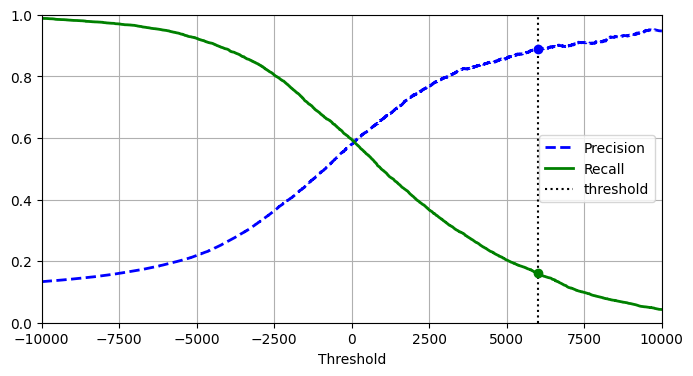

In [41]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_8,
                                                         y_scores)

plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-10000, 10000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

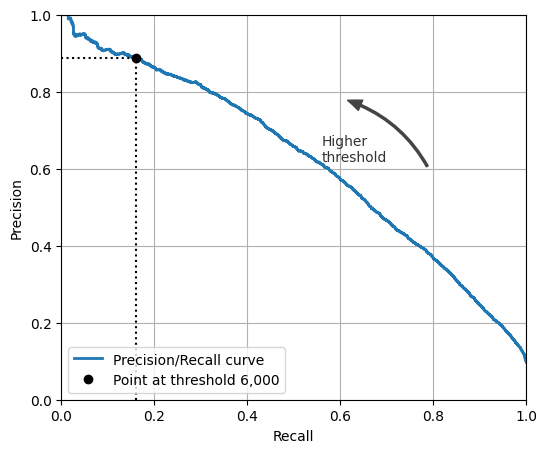

In [43]:
import matplotlib.patches as patches

plt.figure(figsize=(6, 5))

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")


plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 6,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [44]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

6584.920862807563

In [45]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

print('precision: ', precision_score(y_train_8, y_train_pred_90))
recall_at_90_precision = recall_score(y_train_8, y_train_pred_90)
print('recall : ', recall_at_90_precision)


precision:  0.9002267573696145
recall :  0.13570329858143906


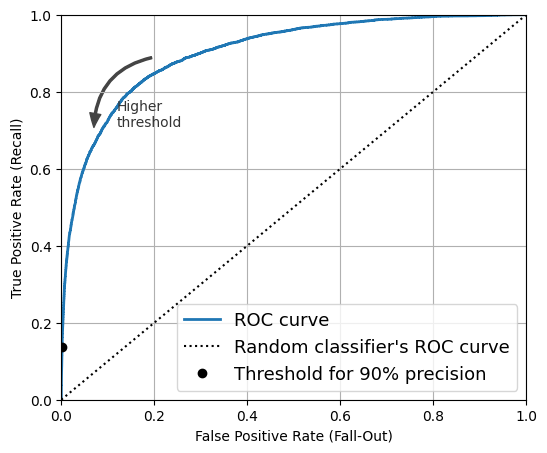

In [29]:

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_8
                                 , y_scores)


idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")


plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_8,
              y_scores)

0.9044123202858236

In [47]:
# Probando otro modelo
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
forest_clf = RandomForestClassifier(random_state=42)
roc_auc_score(y_train_8,
              y_scores)

y_probas_forest = cross_val_predict(forest_clf,
                                    X_train,
                                    y_train_8,
                                    cv=3,
                                    method="predict_proba")

In [48]:
y_probas_forest[:2]

array([[0.98, 0.02],
       [1.  , 0.  ]])

In [49]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_8,
    y_scores_forest)

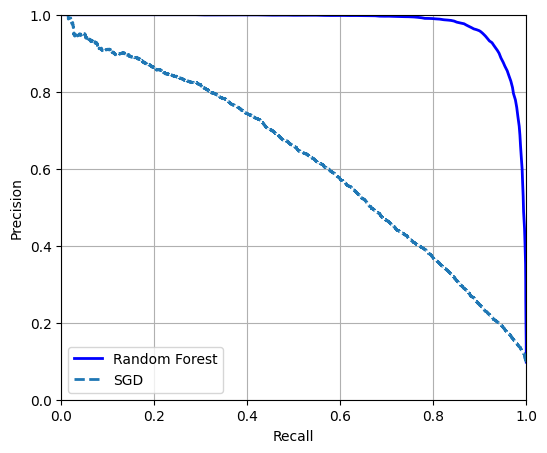

In [50]:
plt.figure(figsize=(6, 5))

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")


plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")


plt.show()

In [51]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
f1_score(y_train_8, y_train_pred_forest)

0.8925557847365461

In [52]:
roc_auc_score(y_train_8, y_scores_forest)

0.9965481456893603

In [53]:
recall_score(y_train_8,
             y_train_pred_forest)

0.8135361476670655

## Clasificación multiple

In [54]:

from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [55]:
svm_clf.predict([some_digit])


array(['9'], dtype=object)

In [56]:
svm_clf.decision_function([some_digit]).round(1)

array([[-0.3,  3.8,  2.7,  3.8,  8.3,  2.8,  0.7,  7.3,  6.2,  9.3]])

In [57]:
### Conociendo a que numero peretenece
svm_clf.decision_function([some_digit]).argmax()

9

In [58]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

### Analisis del error

In [59]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf,
                X_train_scaled,
                y_train,
                cv=3,
                scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

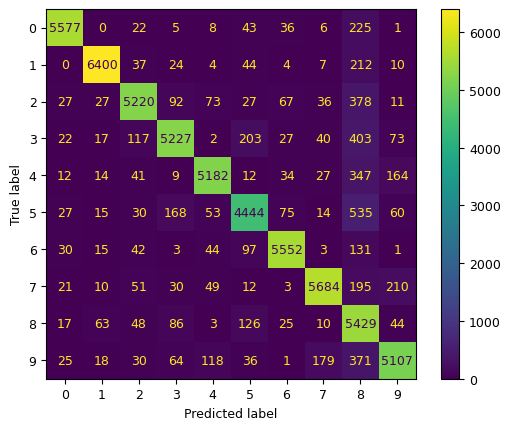

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf,
                                 X_train_scaled,
                                 y_train,
                                 cv=3)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_pred)
plt.show()

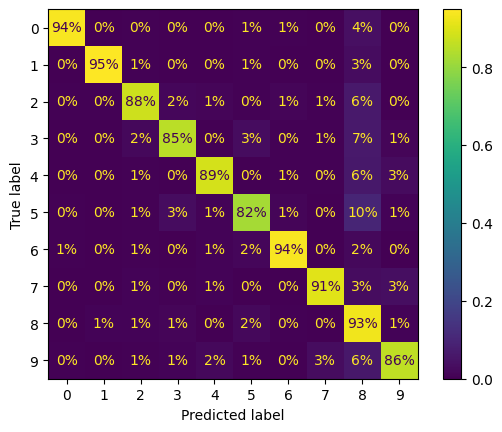

In [62]:
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_pred,
                                        normalize="true",
                                        values_format=".0%")
plt.show()

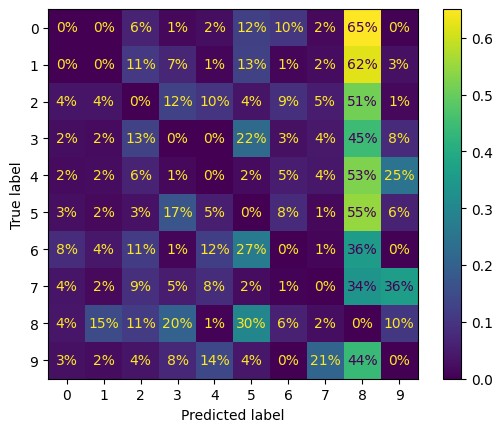

In [61]:

sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true",
                                        values_format=".0%")
plt.show()

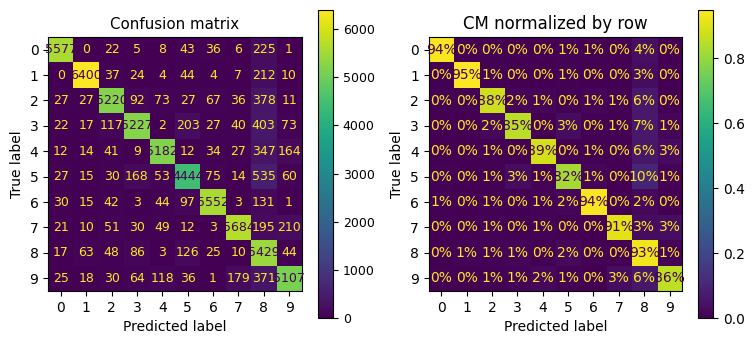

In [63]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_pred,
                                        ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_pred,
                                        ax=axs[1],
                                        normalize="true",
                                        values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()

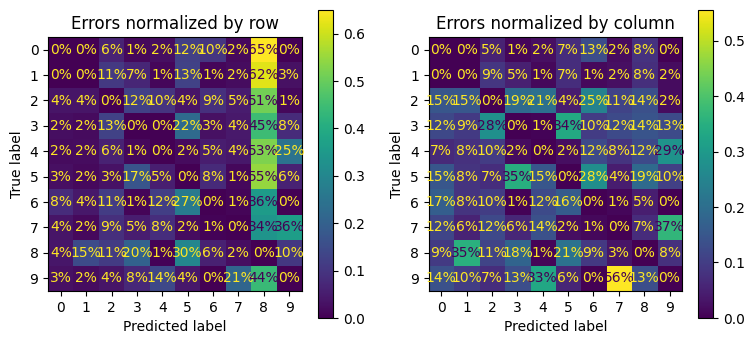

In [64]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_pred,
                                        ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true",
                                        values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train,
                                        y_train_pred,
                                        ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred",
                                        values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()
plt.rc('font', size=14)